### **Machine learning algorithm - Support vector regression**

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

C:\Users\lab_services_student\AppData\Local\Temp\ipykernel_12972\3704216775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Preparing the data for analysis

In [2]:
# Loading the dataset into a data frame
df = pd.read_csv("C:/Users/lab_services_student/Documents/Dataset/RPDA8412_Analysis Features.csv")

In [3]:
# Viewing the first 5 rows of the data frame
df.head()

,timeStamp,air_temp,relhum,press,windsp,winddir,max_windsp,precipitation,ghi,dni,dhi
0,2015-01-01 00:00:00,12.4,25.54,1006,2.72,318.6,3.6,0,122.7,632.2,34.78
1,2015-01-01 00:01:00,12.4,25.66,1006,2.38,312.0,3.2,0,119.9,626.2,34.43
2,2015-01-01 00:02:00,12.4,25.60,1006,3.20,309.2,4.1,0,133.2,642.5,47.16
3,2015-01-01 00:03:00,12.4,25.48,1006,2.30,308.8,3.1,0,154.9,621.9,73.33
4,2015-01-01 00:04:00,12.4,25.64,1006,2.50,315.2,3.0,0,153.7,582.9,78.71


In [4]:
# Viewing the number of columns and rows in the data frame
df.shape

(17280, 11)

In [5]:
# Viewing information related to the data frame
df.describe()

,air_temp,relhum,press,windsp,winddir,max_windsp,precipitation,ghi,dni,dhi
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.0,17280.000000,17280.000000,17280.000000
mean,8.701582,67.729829,1009.649190,1.270847,188.947271,1.984583,0.0,103.138182,178.210890,37.898906
std,4.993406,15.472275,4.325073,0.617391,99.669510,0.813625,0.0,162.767789,307.588747,64.325903
min,-2.100000,25.480000,1002.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,5.300000,55.160000,1006.000000,0.780000,89.400000,1.400000,0.0,0.000000,0.000000,0.000000
50%,8.600000,72.700000,1010.000000,1.240000,195.000000,2.000000,0.0,0.000000,0.000000,0.051000
75%,12.160000,80.200000,1013.000000,1.680000,287.500000,2.500000,0.0,178.325000,270.150000,58.402500
max,20.400000,91.600000,1019.000000,4.600000,360.000000,7.000000,0.0,588.900000,930.000000,345.000000


In [6]:
# ______code_attribution______
# The following method was taken from GeeksforGeeks
# Author: rajput-ji
# Link: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

# Removing columns that are not required
df_new = df.drop(['press','max_windsp','precipitation','dhi'], axis=1)

# _____end_____

In [7]:
# Viewing the first 5 rows of the data frame after the columns have been dropped
df_new.head()

,timeStamp,air_temp,relhum,windsp,winddir,ghi,dni
0,2015-01-01 00:00:00,12.4,25.54,2.72,318.6,122.7,632.2
1,2015-01-01 00:01:00,12.4,25.66,2.38,312.0,119.9,626.2
2,2015-01-01 00:02:00,12.4,25.60,3.20,309.2,133.2,642.5
3,2015-01-01 00:03:00,12.4,25.48,2.30,308.8,154.9,621.9
4,2015-01-01 00:04:00,12.4,25.64,2.50,315.2,153.7,582.9


In [8]:
# ______code_attribution______
# The following method was taken from Atlassian
# Author: AJ Welch
# Link: https://www.atlassian.com/data/notebook/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

# Checking to see if there are any values that are missing
df_new.isnull().values.any()

# _____end_____

False

In [9]:
# ______code_attribution______
# The following method was taken from W3Schools
# Author: W3Schools
# Link: https://www.w3schools.com/python/pandas/ref_df_duplicated.asp

# Checking to see if there are any duplicate values
df_new.duplicated()

# _____end_____

0        False
1        False
2        False
3        False
4        False
         ...  
17275    False
17276    False
17277    False
17278    False
17279    False
Length: 17280, dtype: bool

### Visualizing the data

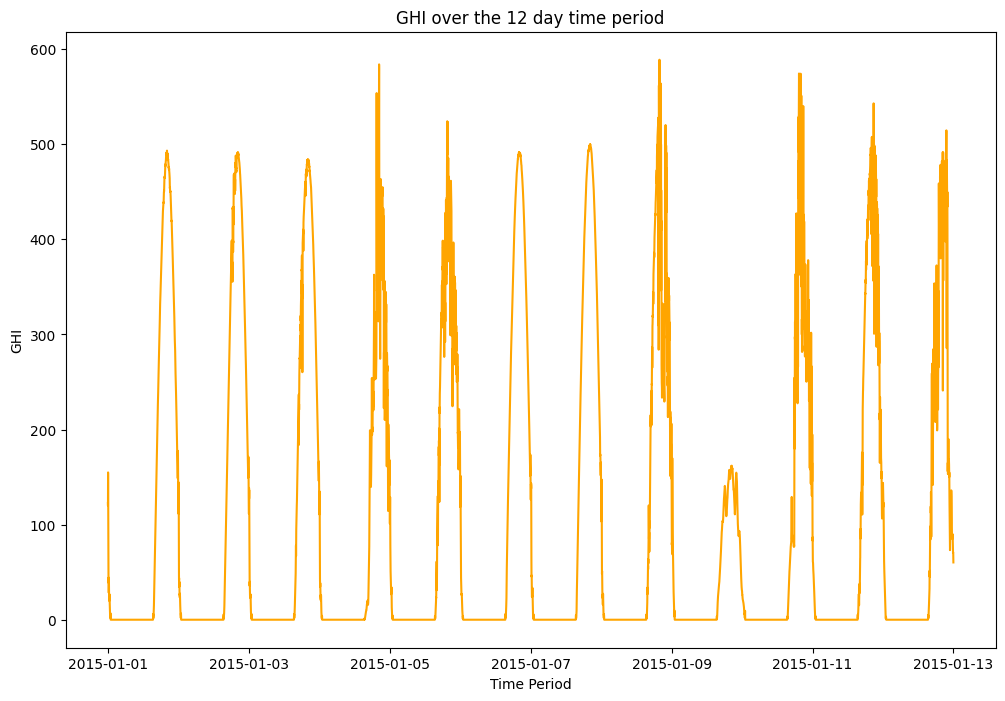

In [10]:
# ______code_attribution______
# The following method was taken from freeCodeCamp
# Author: Ihechikara Abba
# Link: https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

# Setting the figure size for the line plot
plt.figure(figsize=(12,8))

# _____end_____

# ______code_attribution______
# The following method was taken from DataCamp
# Author: Arunn Thevapalan
# Link: https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python

# Declaring variables for the time period and ghi
time_period = df_new['timeStamp']
ghi = df_new['ghi']

# Converting the time period variable to date time
ghi_time_period = pd.to_datetime(time_period)

# Creating a line plot to display the ghi and specifying the x-axis and y-axis label as well as the title 
plt.plot(ghi_time_period, ghi , color = 'orange')
plt.xlabel('Time Period')
plt.ylabel('GHI')
plt.title('GHI over the 12 day time period')

# Displaying the line plot
plt.show()

# _____end_____

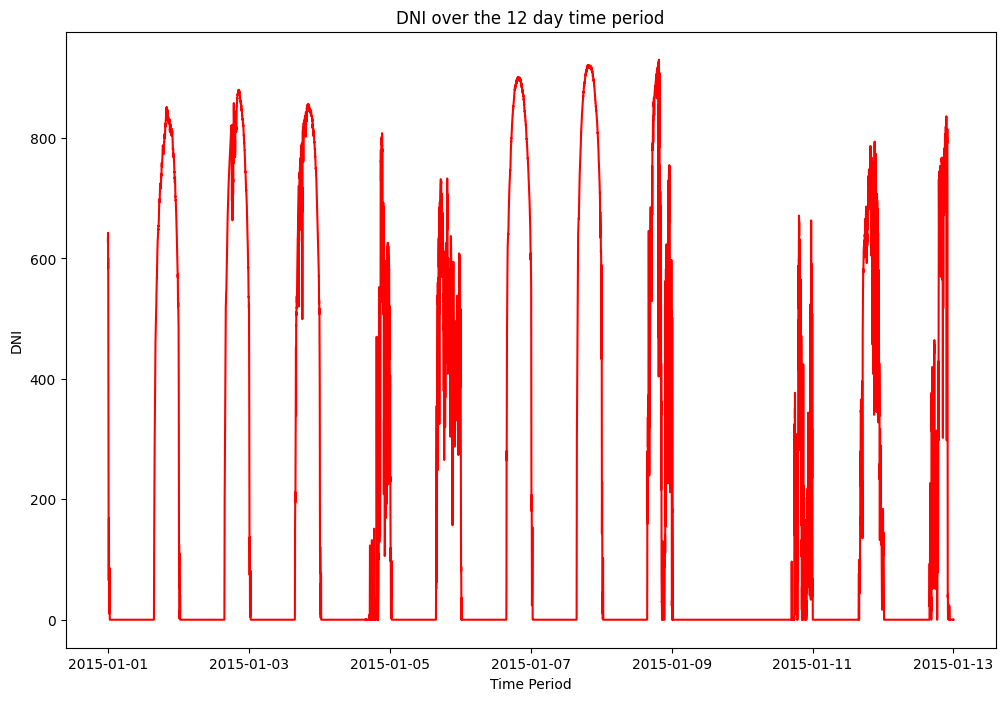

In [11]:
# ______code_attribution______
# The following method was taken from freeCodeCamp
# Author: Ihechikara Abba
# Link: https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

# Setting the figure size for the line plot
plt.figure(figsize=(12,8))

# _____end_____

# ______code_attribution______
# The following method was taken from DataCamp
# Author: Arunn Thevapalan
# Link: https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python

# Declaring variables for the time period and dni
time_period = df_new['timeStamp']
dni = df_new['dni']

# Converting the time period variable to date time
dni_time_period = pd.to_datetime(time_period)

# Creating a line plot to display the dni and specifying the x-axis and y-axis label as well as the title 
plt.plot(dni_time_period, dni , color = 'red')
plt.xlabel('Time Period')
plt.ylabel('DNI')
plt.title('DNI over the 12 day time period')

# Displaying the line plot
plt.show()

# _____end_____

In [12]:
# ______code_attribution______
# The following method was taken from GeeksforGeeks
# Author: rajput-ji
# Link: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

df_new=df.drop(['timeStamp'], axis=1)

# ____end____

### Creating the support vector regression model

In [13]:
# Assigning X and y variables
X = df_new[['air_temp','relhum','windsp','winddir']]
y = df_new[['ghi','dni']]

In [14]:
# ______code_attribution______
# The following method was taken from Medium
# Author: Sebastien Simon
# Link: https://medium.com/@sebastienwebdev/forecasting-weather-patterns-with-lstm-a-python-guide-without-dates-433f0356136c

# Scaling the data - The data was scaled in the same manner for the LSTM model
scaling = MinMaxScaler(feature_range=(0, 1))
scaled_X = scaling.fit_transform(X)
scaled_y = scaling.fit_transform(y)

# _____end_____

In [15]:
# Creating a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=0)

In [16]:
# ______code_attribution______
# The following method was taken from GeeksforGeeks
# Author: amishra1577
# Link: https://www.geeksforgeeks.org/multioutput-regression-in-machine-learning/

# Creating the support vector regression model with a MultiOutputRegressor
svr_model = MultiOutputRegressor(SVR(kernel='rbf', gamma = 0.1 , C = 1.0, epsilon = 0.1))

# _____end_____

In [17]:
# Fitting the scaled training data into the model
svr_model.fit(X_train,y_train)

MultiOutputRegressor(estimator=SVR(gamma=0.1))

### Making predictions

In [18]:
# ______code_attribution______
# The following method was taken from Medium
# Author: Sebastien Simon
# Link: https://medium.com/@sebastienwebdev/forecasting-weather-patterns-with-lstm-a-python-guide-without-dates-433f0356136c

# Making predictions using the test data - Predictions were made and transformed in the same manner as the LSTM model
solar_irradiance_pred = svr_model.predict(X_test)

# Inverse transforming the scaled predictions 
solar_irradiance_pred_final = scaling.inverse_transform(solar_irradiance_pred)

#______end_____

# Viewing the predictions
solar_irradiance_pred_final

array([[ 11.82187029,  24.90326253],
       [ 12.06151578,  71.80273715],
       [  1.24129775,   0.61497471],
       ...,
       [-14.85132356,  47.34255188],
       [101.52538918, 142.6809415 ],
       [ 31.11967423,  40.41372134]])

In [19]:
# ______code_attribution______
# The following method was taken from Medium
# Author: Sebastien Simon
# Link: https://medium.com/@sebastienwebdev/forecasting-weather-patterns-with-lstm-a-python-guide-without-dates-433f0356136c

# Inverse transforming the scaled y test data
y_final = scaling.inverse_transform(y_test)

# _____end_____

### Actual vs predicted graph

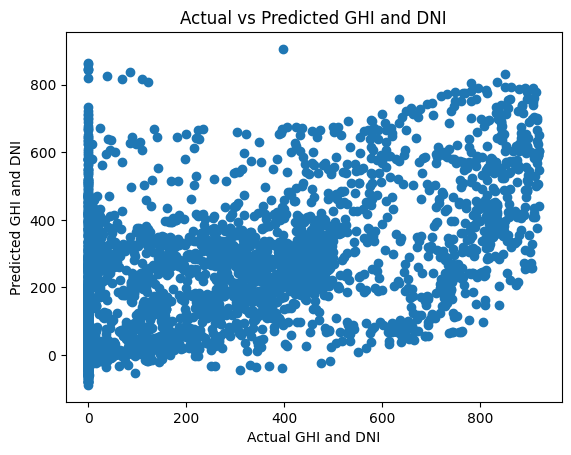

In [20]:
# ______code_attribution______
# The following method was taken from Medium
# Author: Dooinn Kim
# Link: https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a

plt.scatter(y_final, solar_irradiance_pred_final)
plt.xlabel('Actual GHI and DNI')
plt.ylabel('Predicted GHI and DNI')
plt.title('Actual vs Predicted GHI and DNI')
plt.show()

# ______end_____

### Evaluating the model

#### Mean square error

In [21]:
mse = mean_squared_error(y_final,solar_irradiance_pred_final)
mse

31538.986273693212

#### Root mean square error

In [22]:
rmse = root_mean_squared_error(y_final,solar_irradiance_pred_final)
rmse

167.66867612970208

#### Mean absolute percentage error

In [23]:
mape = mean_absolute_percentage_error(y_final,solar_irradiance_pred_final)
mape

1.9860491764444995e+17

#### R2 Score

In [24]:
r2 = r2_score(y_final,solar_irradiance_pred_final)
r2

0.4825426527247966

#### Mean absolute error



In [25]:
mae=mean_absolute_error(y_final,solar_irradiance_pred_final)
mae

113.12210617688226